In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import ast


In [50]:
county_2016 = pd.read_csv('2016_registration.csv')
county_2020 = pd.read_csv('2020_registration.csv')
district_2016 = pd.read_csv('district_demo_2016.csv')
district_2020 = pd.read_csv('district_demo_2020.csv')
district_2020

,District,district_pop,n_reg_voters,female,male,white,black,american_indian/alaska_native,native_hawaiian/pacific_islander,hispanic,...,other_race_percent_of_pop,democrat_percent_of_pop,republican_percent_of_pop,unaffiliated_percent_of_pop,green_percent_of_pop,libertarian_percent_of_pop,constitution_percent_of_pop,justice_for_all_percent_of_pop,no_labels_percent_of_pop,we_the_people_percent_of_pop
0,1.0,733498,491721.0,254213.0,206173.0,231383.0,207465.0,2727.0,10.0,9438.0,...,0.068351,0.343747,0.155450,0.167834,0.000221,0.002755,0.000374,0.0,0.0,0.0
1,2.0,733499,646799.0,307578.0,268634.0,391624.0,117602.0,1540.0,22.0,23587.0,...,0.185428,0.323545,0.209608,0.340787,0.000469,0.006886,0.000504,0.0,0.0,0.0
2,3.0,733499,513402.0,257277.0,219164.0,349699.0,102902.0,1119.0,39.0,13149.0,...,0.081313,0.216769,0.241726,0.235583,0.000333,0.004993,0.000530,0.0,0.0,0.0
3,4.0,733499,631778.0,305447.0,254979.0,357848.0,145546.0,1513.0,33.0,22501.0,...,0.172923,0.394100,0.153276,0.307936,0.000468,0.005164,0.000375,0.0,0.0,0.0
4,5.0,733499,514322.0,253354.0,222047.0,403379.0,51897.0,840.0,7.0,10256.0,...,0.079344,0.183901,0.288443,0.223715,0.000320,0.004297,0.000513,0.0,0.0,0.0
5,6.0,733498,573832.0,293869.0,236800.0,309472.0,176885.0,1385.0,19.0,19009.0,...,0.117343,0.331702,0.201544,0.243623,0.000429,0.004600,0.000424,0.0,0.0,0.0
6,7.0,733499,611479.0,300993.0,258717.0,432801.0,94242.0,3331.0,33.0,16278.0,...,0.110528,0.252640,0.293136,0.281454,0.000367,0.005475,0.000575,0.0,0.0,0.0
7,8.0,733498,545001.0,266796.0,222596.0,302991.0,143289.0,3432.0,70.0,24888.0,...,0.129816,0.260981,0.231588,0.244212,0.000333,0.005275,0.000627,0.0,0.0,0.0
8,9.0,733499,553098.0,277698.0,235532.0,306322.0,131629.0,32027.0,40.0,19994.0,...,0.113265,0.289522,0.213011,0.246293,0.000337,0.004346,0.000545,0.0,0.0,0.0
9,10.0,733499,537100.0,266082.0,233779.0,407139.0,61322.0,826.0,10.0,15086.0,...,0.092438,0.185294,0.306433,0.235819,0.000273,0.003941,0.000484,0.0,0.0,0.0


# Identifying Cracking and Packing Analysis

In [24]:
# list of demo groups to make proportion columns
demo_groups = county_2016.columns[2:19].tolist()
# adding column for percentage of each demographic over total registered voters 

def add_proportions(df):
    for col in demo_groups:
        df[f'{col}_percent'] = df[col] / df['total']
    

add_proportions(county_2016)
add_proportions(county_2020)

Proportion of Black to White Registered Voters in North Carolina in 2016 vs 2020 

In [101]:
def add_ratios(df):
    # calculate ratio of black to white registered voters
    df["black_white_ratio"] = df['black'] / df['white']
    # calculate ratio of democrat to republican registered voters 
    df["dem_rep_ratio"] = df["democrat"] / df['republican']

add_ratios(district_2016)
add_ratios(district_2020)

<Axes: >

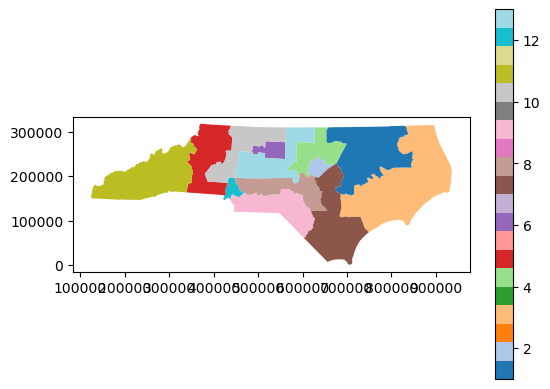

In [56]:
# reading shape file 
shp_2020 = gpd.read_file("2020_shp/C-Goodwin-A-1-TC.shp")
# changing column type and name for better merging 
shp_2020['DISTRICT'] = shp_2020['DISTRICT'].astype(float)
shp_2020 = shp_2020.rename(columns={"DISTRICT": "District"})  # Replace with actual column name
shp_2020.plot(column='District', cmap='tab20', legend=True)

<Axes: >

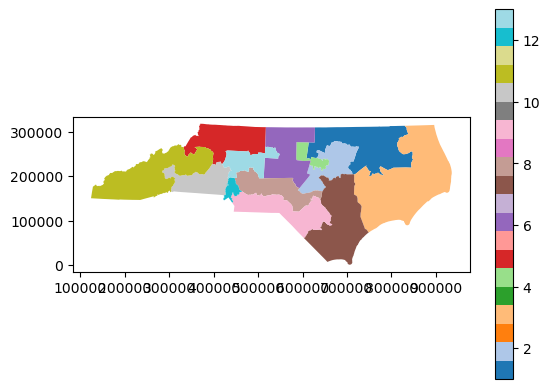

In [48]:
shp_2016 = gpd.read_file("2016_shp/2016_Contingent_Congressional_Plan_Corrected.shp")
shp_2016.plot(column='District', cmap='tab20', legend=True)

In [83]:
# merging with props

map2020 = shp_2020.merge(district_2020, on = "District")
map2016 = shp_2016.merge(district_2016, on = "District")
# centroids are calculated so that districts can be labeled 
map2020['centroid'] = map2020.geometry.centroid
map2016['centroid'] = map2016.geometry.centroid


(83408.25890375, 976394.0624934785, -15041.311532629654, 333963.37098524533)

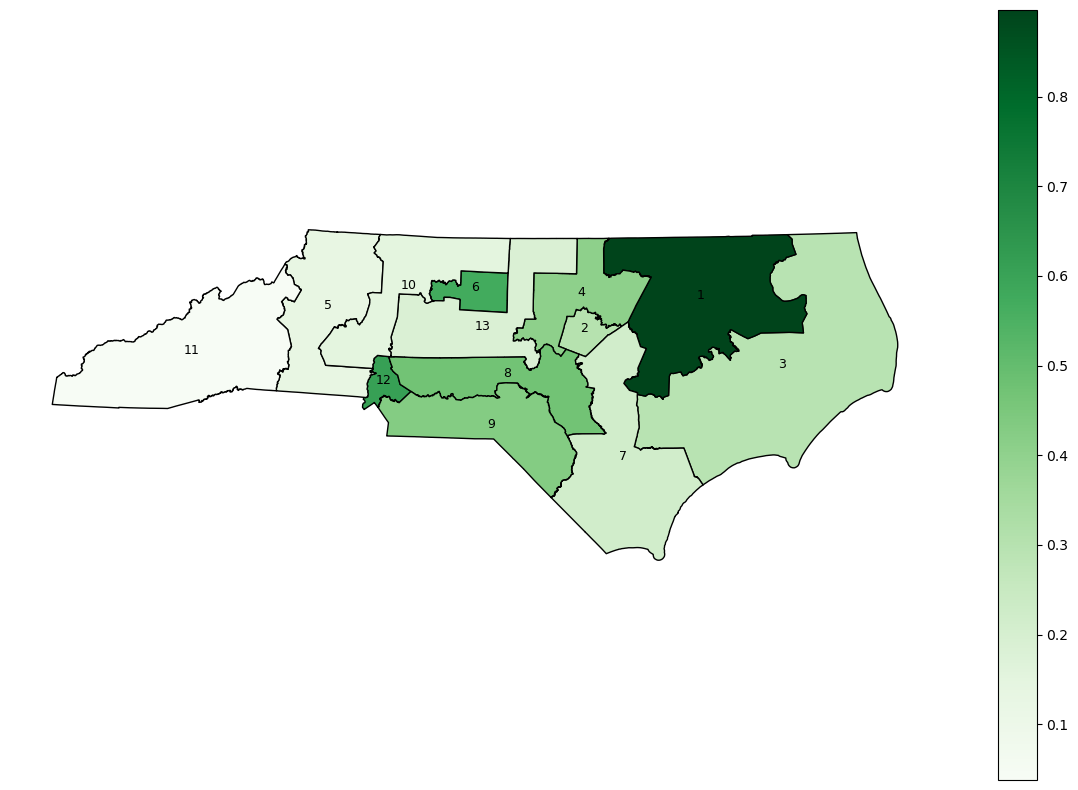

In [134]:
map2020.plot(column='black_white_ratio', cmap='Greens', legend=True,figsize=(15, 10), edgecolor='black')
# plotting labels 
for x, y, label in zip(map2020['centroid'].x, map2020['centroid'].y, map2020['District']):
    # needed to specially shift district 13 label down 
    if label == 13.0:
        y = y - 18000
    elif label == 8:
        y = y + 5000
    plt.text(x, y, str(int(label)), fontsize=9, ha='center', color='black')
plt.axis("off")


(83408.25890377238, 976394.0624934875, -15041.311532629654, 333963.37098524533)

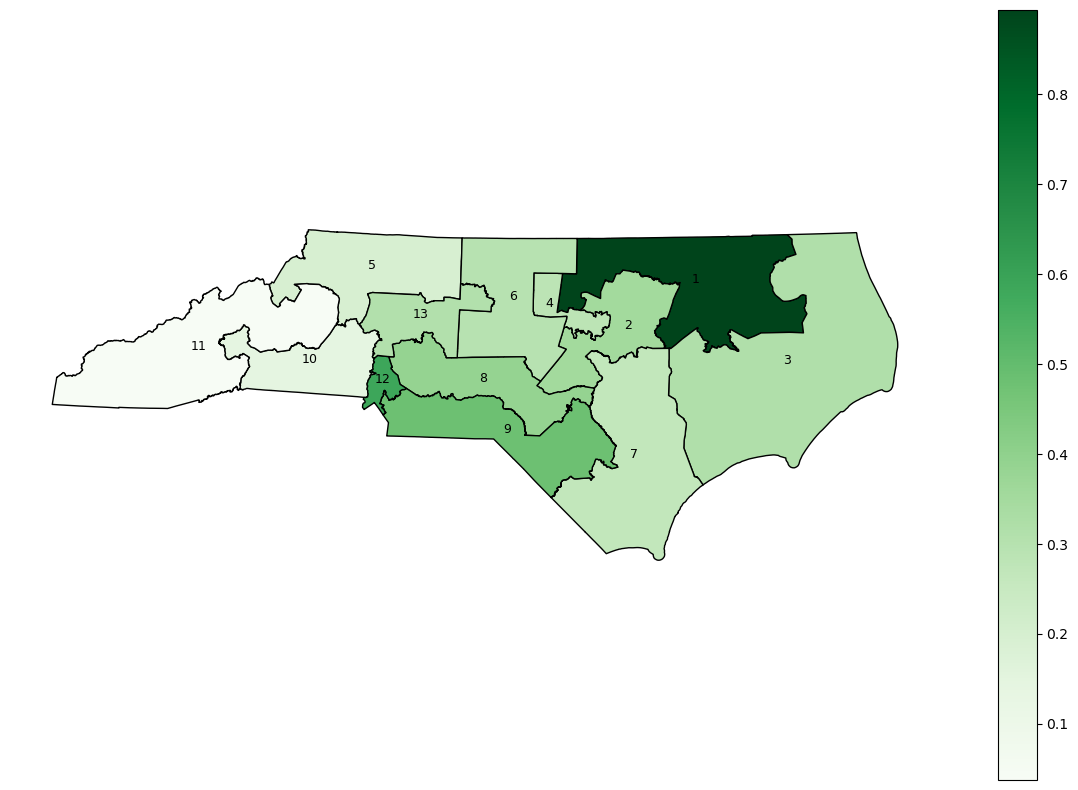

In [136]:
map2016.plot(column='black_white_ratio', cmap='Greens', legend=True,figsize=(15, 10), edgecolor='black')
for x, y, label in zip(map2016['centroid'].x, map2016['centroid'].y, map2016['District']):
    # need to specially shift district 4 label left 
    if label == 4:
        x = x - 15000
    elif label == 2:
        x = x + 15000
    plt.text(x, y, str(int(label)), fontsize=9, ha='center', color='black')
plt.axis("off")

(83408.25890375, 976394.0624934785, -15041.311532629654, 333963.37098524533)

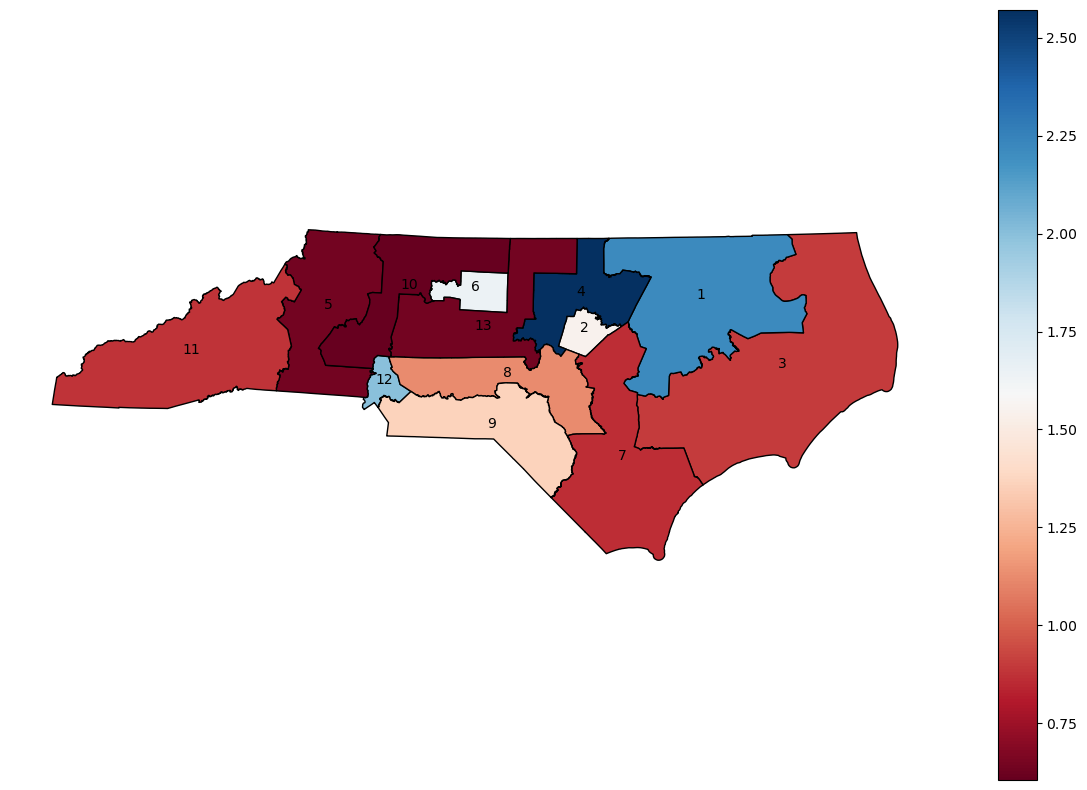

In [137]:
map2020.plot(column='dem_rep_ratio', cmap='RdBu', legend=True,figsize=(15, 10), edgecolor='black')
for x, y, label in zip(map2020['centroid'].x, map2020['centroid'].y, map2020['District']):
    if label == 13.0:
        y = y - 18000

    elif label == 8:
        y = y + 5000
    plt.text(x, y, str(int(label)), fontsize=10, ha='center', color='black')
plt.axis("off")

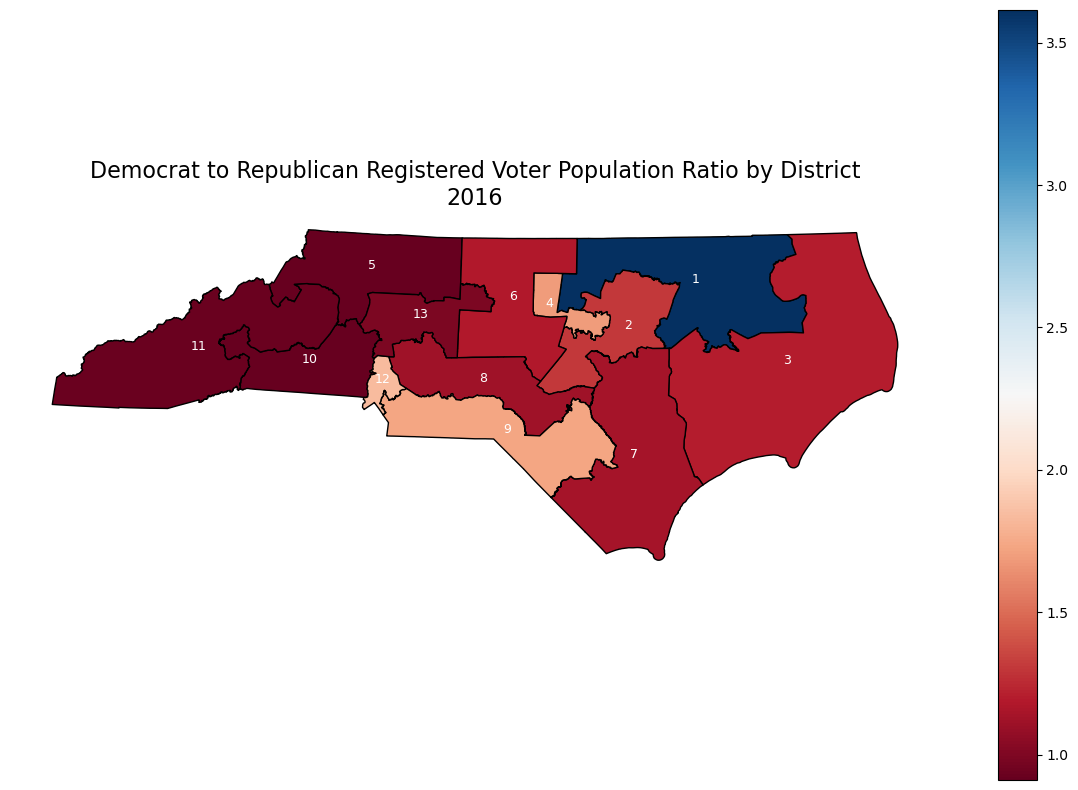

In [139]:
map2016.plot(column='dem_rep_ratio', cmap='RdBu', legend=True,figsize=(15, 10), edgecolor='black')
for x, y, label in zip(map2016['centroid'].x, map2016['centroid'].y, map2016['District']):
    if label == 4:
        x = x - 15000
    elif label == 2:
        x = x + 15000
    plt.text(x, y, str(int(label)), fontsize=9, ha='center', color='white')
plt.axis("off")
plt.title("Democrat to Republican Registered Voter Population Ratio by District\n2016", fontsize=16)
plt.savefig("2016_dem_rep_ratio.png")

# Further Analyzing Cracking 

In [148]:
# list of counties 
counties = county_2016['index'].tolist()

In [152]:

def get_districts(df):
    # getting list of lists of counties in each district 
    districts = df.County.apply(ast.literal_eval).tolist() 
    # for each district 
    for i in range(12):
        district = districts[i]
        district_name = i + 1
        # go through each county and add count 
        for county in district:
            
get_districts(district_2020)

0
1
2
3
4
5
6
7
8
9
10
11
12


In [162]:
district_2020['County'].apply(ast.literal_eval).tolist()[0][0]

'BERTIE'